## Récupération des données nécessaires

In [4]:
import os
import sys

import numpy as np
import s3fs
import zipfile

sys.path.insert(0, 'datasets/')

In [5]:
# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

In [6]:
# Télécharger les données dans le service
PATH_IN = 'gvimont/diffusion/hackathon-minarm-2024/Acoustique/LivingRoom_preprocessed_hack.zip'
fs.download(PATH_IN, 'data/LivingRoom_preprocessed_hack.zip')

[None]

In [6]:
# Décompresser les données
with zipfile.ZipFile("data/LivingRoom_preprocessed_hack.zip","r") as zip_file:
    zip_file.extractall("data/")

### Optionnel : Visualiser les données

In [ ]:
DATA_PATH = "data/LivingRoom_preprocessed_hack/"
SAMPLE_PATH = f"{DATA_PATH}/Human1"

dr = dataset.Dataset(roomsetup.RoomSetup(config.speaker_xyz,
                config.mic_xyzs_base,
                config.x_min,
                config.x_max,
                config.y_min,
                config.y_max,
                config.walls), SAMPLE_PATH)

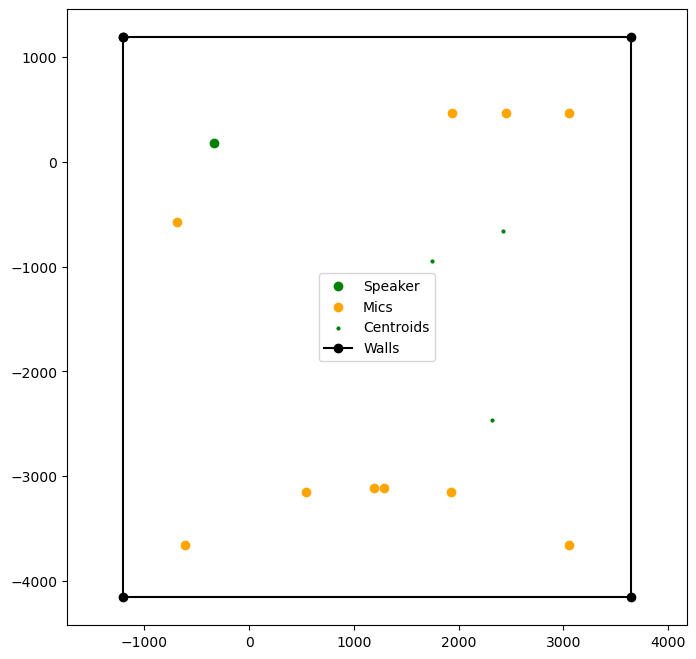

In [ ]:
centroid = np.load(f"{SAMPLE_PATH}/centroid.npy")
print(f"humains : {centroid.shape}")
rirs = np.load(f"{SAMPLE_PATH}/deconvoled_trim.npy", mmap_mode='r')
print(f"rirs : {rirs.shape}")

In [ ]:
dr.room_setup.plot_room(centroid)